# What behaviors are associated with learning in Interactive Radio Instruction?   

This is analysis seeks to perform a correlation analysis to identify what learner behavior may be associated with measures of learning e.g earning a certificate of completion.

In [1]:
#Importing Libraries
import pandas as pd

#viz
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

pd.set_option('display.max_columns', 1000) #show columns in scrollable table
pd.set_option('display.max_rows', 500)
pd.set_option("max_colwidth", None) #don't truncate data in columns.
pd.set_option('display.max_columns', 1000) #show columns in scrollable table
pd.set_option('display.max_rows', 500)
pd.set_option("max_colwidth", None) #don't truncate data in columns.

#read file from data folder, return file
def read_data(file_name, folder="/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_data_v2_pickle/"):
    #combine foler and file name to get the full path
    df = pd.read_pickle(folder + file_name)
    return df

response_df = read_data(file_name="response.pkl")
response_df.sample(3, random_state=5) #See sample of data

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
350758,2021-07-21 10:10:49,2021-07-21 10:10:49,38080,689443,profile/access#internet,No,0
1326640,2022-10-12 05:30:04,2022-10-12 05:30:04,60765,2634967,airscience-2022a/course/tests/step-1-test#q1-what-are-the-first-2-steps-of-the-engineering-process,"Identify, investigate",1
1139735,2022-07-12 22:51:44,2022-07-12 22:51:44,53007,2290362,course-menu,My Profile,0


In [2]:
# Getting learners registered with Lira section
registration_df = read_data(file_name="registration.pkl")
registration_df.sample(3, random_state=5) #See sample of data

,created,updated,course_id,user_id
id,,,,
68167,2022-09-20 12:00:24,2022-09-20 12:00:24,5,62814
41133,2021-07-08 06:00:26,2021-07-08 06:00:26,3,32204
40410,2021-07-07 02:39:43,2021-07-07 02:39:43,3,30940


# Sampling Method 

Which course learners should we use for this analysis?
Course 3 Lira learners that completed the baseline survey will be used for this analysis. 

In [3]:
print("Number of Users Registed for Course Sections")
print(registration_df["course_id"].value_counts())

Number of Users Registed for Course Sections
3    17950
2    10834
5     2754
4     1417
Name: course_id, dtype: int64


## Restrict to Lira Course 3

In [4]:
#Get user ids
is_lira_id_5 = registration_df["course_id"] == 5
lira_learners_ids = registration_df.loc[is_lira_id_5, "user_id"]
print("Total Lira Learners", len(lira_learners_ids))

Total Lira Learners 2754


In [5]:
#Restrict to user_ids
lira_responses = response_df[response_df["user_id"].isin(lira_learners_ids)]

#Restrict to dates
#TODO: Exam questions are listed outside of this time. What was the exam in course 3?
is_course_3_date = (lira_responses["created"] >= "2022-08-11") & (lira_responses["created"] <= "2022-12-29") 
lira_responses = lira_responses.loc[is_course_3_date]

lira_responses.sample(3)

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
1428927,2022-11-06 20:09:13,2022-11-06 20:09:13,59454,2816493,airscience-2022a/course/step-5-create/step-5-lesson-3/go-to-questions#q2-what-part-inside-a-washing-machine-helps-increase-friction-while-washing,None of the above,0
1289921,2022-10-01 03:45:07,2022-10-01 03:45:07,60798,2563293,airscience-2022a/course/intro-step/intro-step-lesson-3/go-to-questions#what-is-engineering,The process of using science and mathematics to simplify life,1
1233912,2022-09-21 11:51:26,2022-09-21 11:51:26,63919,2450062,profile/neighborhood-type,city,0


## Restrict to Baseline Completers

In [6]:
#Get People who have compleed the last question on the baseline
is_last_baseline_question = lira_responses["key"] == "airscience-2022a/course/baseline-survey#question-10-when-facing-a-new-problem-lesson-objectives-baseline-survey-objectives-md-10-creativity-and-ego-resilience"
users_completed_baseline_ids = lira_responses[is_last_baseline_question]["user_id"].unique()
print("users that completed baseline", len(users_completed_baseline_ids))

users that completed baseline 1552


In [7]:
#Restrict to user_ids that completed baseline
lira_responses = lira_responses[lira_responses["user_id"].isin(users_completed_baseline_ids)]
lira_responses.sample(3)

,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
1355288,2022-10-19 10:58:09,2022-10-19 10:58:09,64237,2686667,airscience-2022a/course/step-3-brainstorm/step-3-lesson-2/go-to-questions#q2-which-forces-are-applied-in-a-washing-machine,Frictional force,0
1278623,2022-09-29 11:34:52,2022-09-29 11:34:52,65664,2542095,airscience-2022a/course/intro-step/intro-step-lesson-2/go-to-questions#what-is-the-meaning-of-technology,Items that simplify life or solve a problem,1
1493823,2022-11-28 11:31:50,2022-11-28 11:31:50,57072,2925273,airscience-2022a/course/step-4-plan/step-4-lesson-2/go-to-questions#q1-which-of-these-is-a-basic-component-of-an-offgrid-washing-machine,Pedal/handle,0


## Restrict to Paid Users

In [8]:
#Paid Users
data_pkl_folder = "/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_data_v2_pickle/"
payments_df = pd.read_pickle(data_pkl_folder + "payments.pkl")
#get paid user ids
paid_user_payments = payments_df.query("payment_stage == 'paid'").drop_duplicates(subset=["user_id"], keep="last")
is_response_from_paid_user = lira_responses["user_id"].isin(paid_user_payments["user_id"])

lira_responses = lira_responses.loc[is_response_from_paid_user]
num_of_paid_lira_users = lira_responses["user_id"].nunique()
print("number of paid lira users ", num_of_paid_lira_users)
lira_responses.sample(4)


number of paid lira users  414


,created,updated,user_id,source_id,key,value,correct
id,,,,,,,
1502455,2022-12-05 05:35:08,2022-12-05 05:35:08,64732,2940132,airscience-2022a/course/tests/step-7-test#q1-which-is-the-less-important-improvement-on-our-washing-machine-prototype,Paint it,1
1336730,2022-10-15 09:36:59,2022-10-15 09:36:59,57504,2654572,airscience-2022a/course/step-1-identify/step-1-lesson-4/go-to-questions#how-do-scientists-analyze-data,by reading about data,0
1532891,2022-12-16 12:36:22,2022-12-16 12:36:22,59077,2988931,airscience-2022a/course/endline-survey#question-6-bodas-are-going-too-fast-lesson-objectives-endline-survey-objectives-md-6-problem-solving-process,I make a plan and advise the local leadership,0
1541878,2022-12-18 12:37:11,2022-12-18 12:37:11,62890,3002210,tech-team-static/static-pages/missed-tasks,Missed lessons ({pending_tasks}),0


Raw Counts
mobile-money    609
scholarship     293
Name: payment_type, dtype: int64
Percentages %
mobile-money    0.675166
scholarship     0.324834
Name: payment_type, dtype: float64


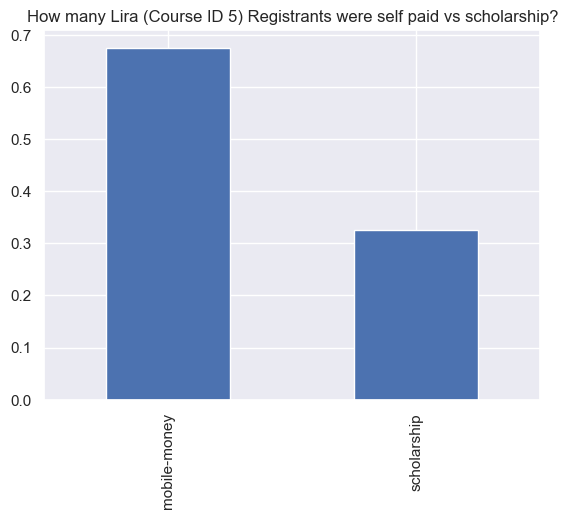

In [20]:
# Check if user_id from response table is present in payments table
is_paid_lira_learner = payments_df["user_id"].isin(lira_responses["user_id"])
lira_payments = payments_df.loc[is_paid_lira_learner, "payment_type"]

# #drop duplicates of user payments - assume last is the final status
# lira_payments.drop_duplicates(subset="user_id", keep="last")

print("Raw Counts")
print(lira_payments.value_counts())

print("Percentages %")
print(lira_payments.value_counts(normalize=True))

# Plot Payment Types
lira_payments.value_counts(normalize=True).plot.bar()
plt.title("How many Lira (Course ID 5) Registrants were self paid vs scholarship?")
plt.show()

# Feature Engineering
The following features are of interest for this analysis:
- lesson_questions = the number of unique lesson questions a user has responded to over the course (quantitative)
- Correct Test Questions (count) = the number of test questions a user answered correctly over the course
- Correct Exam Questions (Count) - the number of questions a user answered correctly on the final exam assessment
- Number of Responses Sent During Broadcast. - number of responses learners sent during the scheduled radio broadcast time (11:15 - 11:45 UTC, 24 HR time format)

In [158]:
def get_step(keys):
    step_pattern = r"((?<=step-)\d{1,2}|baseline|intro-step|endline|course-menu|exam-questions)"
    step_column = keys.str.extract(step_pattern)
    return step_column

def get_lesson_number(keys):
    lesson_pattern = r"(?<=lesson-)([\d{1,2}])"
    lesson_column = keys.str.extract(lesson_pattern)
    return lesson_column

def get_question_number(keys):
    question_pattern = r"(?<=q)([\d{1,2}])"
    question_column = keys.str.extract(question_pattern)
    return question_column

def expand_question_keys(df):
    #Label step, lesson, and question
    df["step_num"] = get_step(df["key"])
    df["lesson_num"] = get_lesson_number(df["key"])
    df["question_num"] = get_question_number(df["key"])

    return df
    pass



In [159]:
# Expanding Keys to label steps, lessons, and question numbers
lira_responses_to_assessments = expand_question_keys(lira_responses)
#drop non step questions
#lira_responses_to_assessments = lira_responses_to_assessments.dropna
lira_responses_to_assessments.sample(5, random_state=3)

,created,updated,user_id,source_id,key,value,correct,step_num,lesson_num,question_num
id,,,,,,,,,,
1446426,2022-11-10 12:04:50,2022-11-10 12:04:50,56870,2846018,airscience-2022a/course/step-5-create/step-5-lesson-3/go-to-questions#q2-what-part-inside-a-washing-machine-helps-increase-friction-while-washing,Agitator,1,5,3,2
1560118,2022-12-25 04:13:22,2022-12-25 04:13:22,59566,3029166,airscience-2022a/course/tests/step-10-test#learn-more-about-it/question-12-what-was-the-most-important-improvement-on-our-washing-machine-prototype,Adding a circular rubber pedal unit,1,10,NaN,NaN
1473594,2022-11-17 21:09:57,2022-11-17 21:09:57,11559,2890198,tech-team-static/static-pages/missed-tasks,Missed lessons ({pending_tasks}),0,NaN,NaN,NaN
1534194,2022-12-16 17:01:57,2022-12-16 17:01:57,27356,2990888,airscience-2022a/course/intro-step/intro-step-lesson-3/go-to-questions#what-is-a-prototype,The first samples of a technology that someone makes.,1,intro-step,3,NaN
1320653,2022-10-10 08:03:46,2022-10-10 08:03:46,61921,2624182,airscience-2022a/course/step-2-investigate/step-2-lesson-1/go-to-questions#q1-what-is-time-poverty,All the above.,1,2,1,1


In [160]:

is_lesson_response = lira_responses_to_assessments["key"].str.contains("lesson") & lira_responses_to_assessments["key"].str.contains("step")
lesson_keys = lira_responses_to_assessments[is_lesson_response]["key"].unique()
print("num of unique lessons questions answered by learners:", len(lesson_keys))

num of lesson questions: 102


In [161]:
is_test_response = lira_responses_to_assessments["key"].str.contains("test") & lira_responses_to_assessments["key"].str.contains("step")
test_keys = lira_responses_to_assessments[is_test_response]["key"].unique()
print("num of test questions ", len(test_keys))
print("correct test questions needed to get certificate: ", 0.6 * 115)

num of test questions  107
correct test questions needed to get certificate:  69.0


In [162]:
def calc_user_lessons_done(single_user_responses_df):
    #drop non lesson question responses
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    user_lesson_responses = single_user_responses_df.loc[is_lesson_response]
    #user_lesson_responses_duplicates_removed = user_lesson_responses.drop_duplicates()

    return user_lesson_responses["key"].nunique()


def calc_user_correct_test_questions(single_user_responses_df):
    is_test_response = single_user_responses_df["key"].isin(test_keys)
    user_test_responses = single_user_responses_df.loc[is_test_response]
    #remove duplicate correct answers (We need to know how questions are selected.)
    user_test_responses = user_test_responses.drop_duplicates(subset = ["key", "correct"])

    return user_test_responses["correct"].sum()
    pass

def cal_exam_score():
    pass

def cal_user_resposes_during_broadcast(single_user_responses_df):
    """_summary_

    Args:
        single_user_responses_df (_type_): _description_

    Returns:
        _int_: _count of messages during broadcast time_
    """
    #include only lesson or test quesitons
    is_lesson_response = single_user_responses_df["key"].isin(lesson_keys)
    is_test_response = single_user_responses_df["key"].isin(test_keys)
    single_user_responses_df = single_user_responses_df.loc[is_lesson_response | is_test_response]

    #Remove Sunday responses (no broadcast on Sunday)
    is_Sunday = single_user_responses_df["created"].dt.day_name() == "Sunday"
    non_Sunday_responses = single_user_responses_df.loc[~is_Sunday].set_index("created")
    #get responses during broadcast
    responses_during_broadcast = non_Sunday_responses.between_time(start_time="11:15", end_time="11:45")

    return len(responses_during_broadcast)


## Calculate how many question responses happen during broadcast vs outside?

In [178]:
#TODO:
cal_user_resposes_during_broadcast(lira_responses_to_assessments)

7062

In [163]:
#group respones from lira to users
lira_responses_to_assessments_user_grouped = lira_responses_to_assessments.groupby("user_id")

## Combine Features

In [164]:
#create dataframe with features
lira_learner_outcomes = pd.DataFrame()
lira_learner_outcomes

""


In [165]:
lira_learner_outcomes["lesson_questions"] = lira_responses_to_assessments_user_grouped.apply(calc_user_lessons_done)

In [166]:
lira_learner_outcomes["correct_test_questions"] = lira_responses_to_assessments_user_grouped.apply(calc_user_correct_test_questions)

In [167]:
lira_learner_outcomes["responses_during_broadcast"] = lira_responses_to_assessments_user_grouped.apply(cal_user_resposes_during_broadcast)

In [168]:
lira_learner_outcomes.sample(4)

,lesson_questions,correct_test_questions,responses_during_broadcast
user_id,,,
55828,2,6,0
55186,7,0,0
37836,98,59,21
64732,98,63,149


In [169]:
lira_learner_outcomes.describe()

,lesson_questions,correct_test_questions,responses_during_broadcast
count,414.000000,414.000000,414.000000
mean,51.202899,31.478261,17.057971
std,39.492880,27.475162,30.174657
min,0.000000,0.000000,0.000000
25%,11.000000,4.000000,0.000000
50%,43.500000,26.000000,3.000000
75%,98.000000,58.000000,21.000000
max,102.000000,81.000000,236.000000


There is a strange outlier with the number of responses sent during broadcast. 

# Descriptive Visualizations 

## Time Distribution of Messages

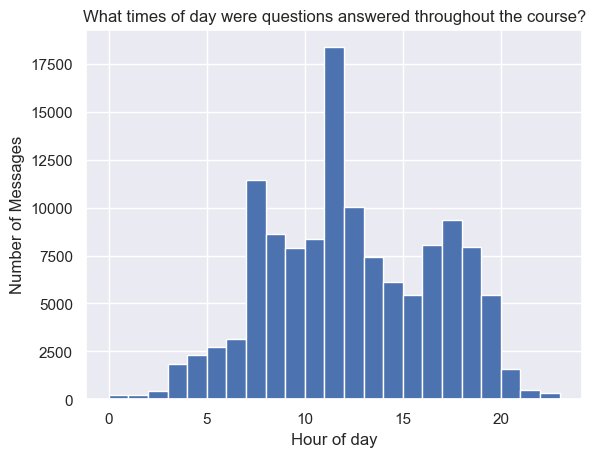

In [171]:
import matplotlib.pyplot as plt
#distribution of times
#response_features["created"].dt.time
lira_responses_to_assessments["created"].dt.hour.hist(bins=23)
plt.title("What times of day were questions answered throughout the course?")
#plt.title("What hours of the day were responses sent?")
plt.xlabel("Hour of day")
plt.ylabel("Number of Messages")
plt.show()

What percentage of messages are algined with broadcast? What's percentage of messages were sent between "start_time="11:15", end_time="11:45")"

In [172]:
lira_responses_to_assessments.set_index("created").between_time(start_time="11:15", end_time="11:45")

,updated,user_id,source_id,key,value,correct,step_num,lesson_num,question_num
created,,,,,,,,,
2022-09-06 11:39:26,2022-09-06 11:39:26,34988,2301148,course-menu,My Course,0,course-menu,NaN,NaN
2022-09-06 11:39:39,2022-09-06 11:39:39,34988,2301150,tech-team-static/static-pages/my-course,Previous Lessons,0,NaN,NaN,NaN
2022-09-08 11:19:41,2022-09-08 11:19:41,26941,2303893,course-menu,My Profile,0,course-menu,NaN,NaN
2022-09-08 11:20:16,2022-09-08 11:20:16,26941,2303898,tech-team-static/static-pages/my-profile,Back to menu,0,NaN,NaN,NaN
2022-09-08 11:20:27,2022-09-08 11:20:27,26941,2303901,course-menu,My Profile,0,course-menu,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-28 11:21:38,2022-12-28 11:21:38,27473,3036252,airscience-2022a/course/tests/step-10-test#learn-more-about-it/question-13-what-new-feature-was-on-our-improved-schematic-diagram,We added a bicycle wheel,0,10,NaN,NaN
2022-12-28 11:21:54,2022-12-28 11:21:54,59060,3036254,course-menu,What you missed,0,course-menu,NaN,NaN
2022-12-28 11:22:09,2022-12-28 11:22:09,27473,3036256,airscience-2022a/course/tests/step-10-test#learn-more-about-it/question-14-how-different-is-a-service-from-a-product-in-a-business,A service involves selling your skills and knowledge,1,10,NaN,NaN


In [176]:
11236 /127900

0.08784988272087568

In [175]:
len(lira_responses_to_assessments)

127900

In [136]:

print("Messages Sent during Hours of Day (24HR)")
print(lira_responses_to_assessments["created"].dt.hour.value_counts())

Messages Sent during Hours of Day (24HR)
11    18367
7     11423
12    10019
17     9344
8      8647
10     8384
16     8071
18     7948
9      7916
13     7430
14     6107
15     5460
19     5420
6      3164
5      2749
4      2332
3      1819
20     1588
21      492
2       423
0       235
1       226
22      207
23      129
Name: created, dtype: int64


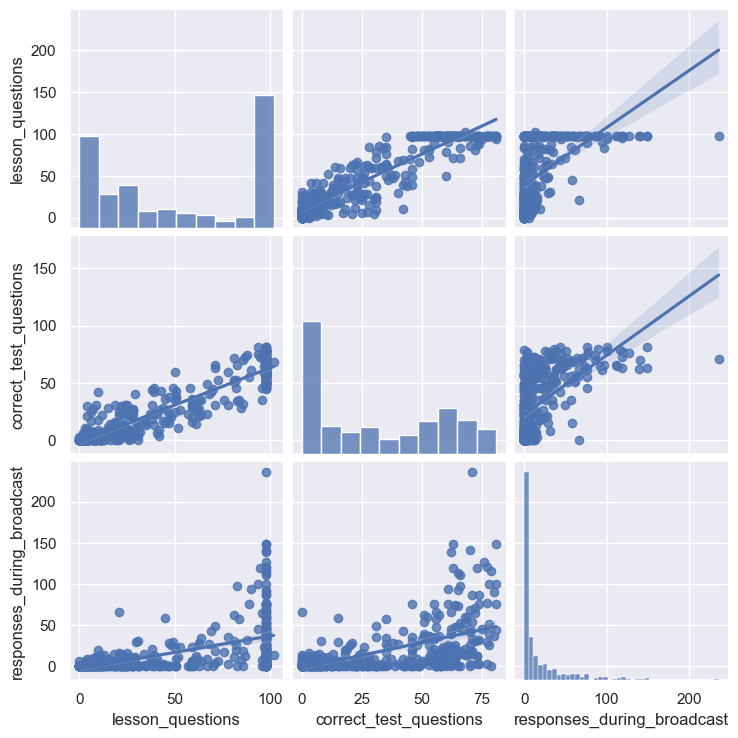

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

sns.pairplot(data=lira_learner_outcomes, kind="reg")
plt.show()

## Active Users Over Time

Enrolled Users:   414


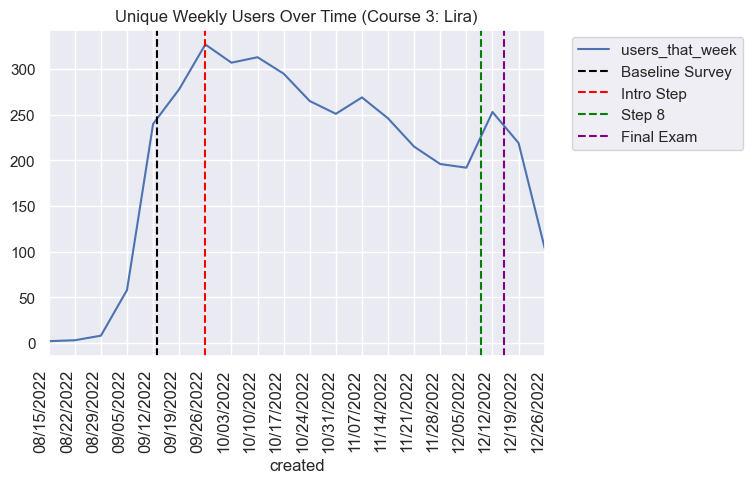

created
2022-08-15      2
2022-08-22      3
2022-08-29      8
2022-09-05     58
2022-09-12    240
2022-09-19    278
2022-09-26    327
2022-10-03    307
2022-10-10    313
2022-10-17    295
2022-10-24    265
2022-10-31    251
2022-11-07    269
2022-11-14    246
2022-11-21    215
2022-11-28    196
2022-12-05    192
2022-12-12    253
2022-12-19    219
2022-12-26    104
Freq: 7D, Name: user_id, dtype: int64

In [138]:
import matplotlib.dates as mdates

def show_unique_users_over_time(df):
    print("Enrolled Users:  ", df["user_id"].nunique())
    weekly_resample = df.resample("7D", on="created")

    plt.title("Unique Weekly Users Over Time (Course 3: Lira)")

    weekly_resample["user_id"].nunique().plot(label="users_that_week")
    #weekly_resample["user_id"].size().plot()

    #EVENT Lines
    #Baseline Survey
    plt.axvline(x = "09/13/2022", color = 'black', linestyle ="--", label = 'Baseline Survey')
    #into step
    plt.axvline(x = "09/26/2022", color = 'red', linestyle ="--", label = 'Intro Step')
    #label exam start
    plt.axvline(x = "12/09/2022", color = 'green', linestyle ="--", label = 'Step 8')
    #label exam start
    plt.axvline(x = "12/15/2022", color = 'purple', linestyle ="--", label = 'Final Exam')

    #Format dates on x axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
    plt.gcf().autofmt_xdate()
    plt.xticks(fontsize=12, rotation=90)

    #Format Legend
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    #show plot
    plt.show() 

    #Show Raw Data
    display(weekly_resample["user_id"].nunique())

show_unique_users_over_time(lira_responses_to_assessments)

# Correlation Analysis

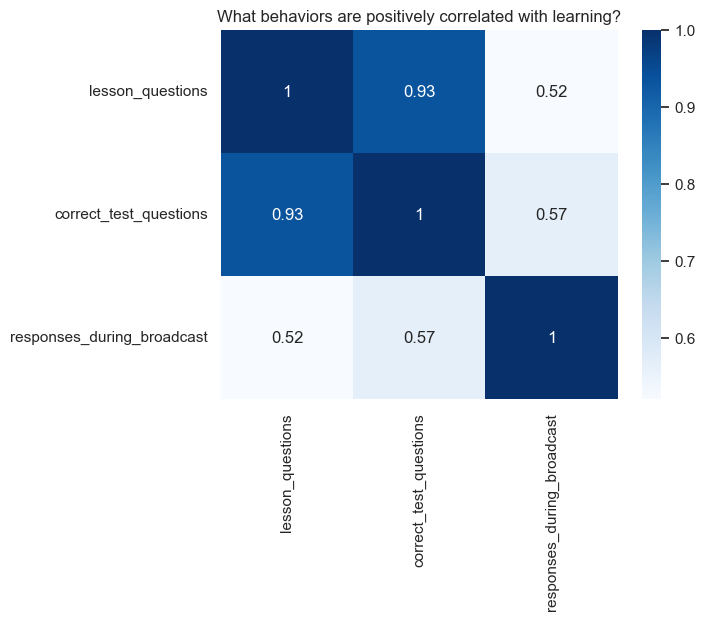

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

corr = lira_learner_outcomes.corr()

plt.title("What behaviors are positively correlated with learning?")

sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

There is a very weak correlation between number of messages sent messages during broadcast time (active participation in broadcasts) and performance in test questions.

# Regression Analysis

The Regression analysis below shows that the coefficient for responses_during broadcast. The R squared value  (0.45) indicates that there responses during broadcast is moderately correlated with correct test questions. 



In [140]:
import statsmodels.api as sm

y = lira_learner_outcomes["correct_test_questions"] #outcome
X = lira_learner_outcomes["responses_during_broadcast"]  #explanatory variable
mod = sm.OLS(y, X) 
res = mod.fit()
print(res.summary())


                                   OLS Regression Results                                  
Dep. Variable:     correct_test_questions   R-squared (uncentered):                   0.482
Model:                                OLS   Adj. R-squared (uncentered):              0.481
Method:                     Least Squares   F-statistic:                              384.8
Date:                    Sun, 01 Oct 2023   Prob (F-statistic):                    4.99e-61
Time:                            16:25:16   Log-Likelihood:                         -1996.2
No. Observations:                     414   AIC:                                      3994.
Df Residuals:                         413   BIC:                                      3998.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.0

To help with interpretation, z score ID and DD. For each STDEV, 
Normalize with Z scores. 

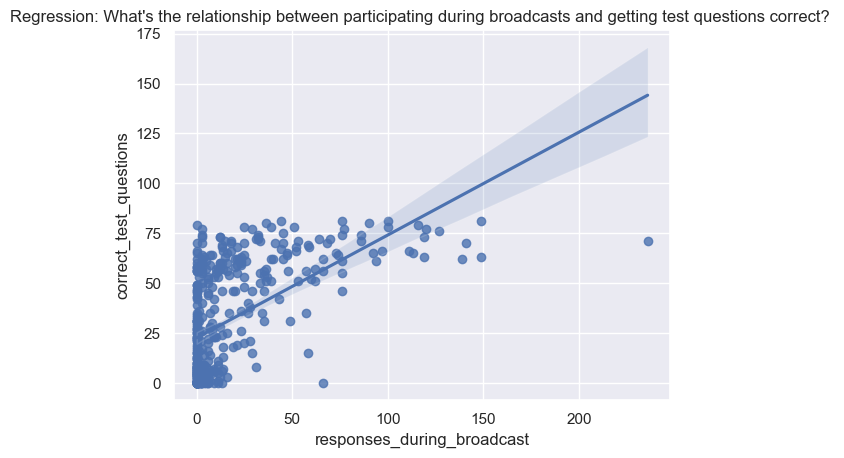

In [141]:
#Create Regression Plot of responses during broadcast vs correct test questions
sns.regplot(data=lira_learner_outcomes, x=X, y=y)
plt.title("Regression: What's the relationship between participating during broadcasts and getting test questions correct? ")
plt.show()

In [142]:
#certified
cert_of_innovation_users = pd.read_csv("/Users/ddbutler/Desktop/Repos/Yiya-Solutions-Analysis/yiya-completion-analysis/course3_feature_use/course3_certified_users.csv")
cert_of_innovation_users.sample(4, random_state=1)

,User ID
94,61555
78,32993
17,35139
100,39079


## Innovation Certificate Regression

This regression might be trash. I'm not sure how to interpret regressions with categorical outcomes. The negative coefficient is contradicting the correlation by negatively associating number of broadcast messages with building a prototype. 

In [143]:
#certificate of innovation learners
lira_learner_outcomes["received_innovation_cert"] =  lira_learner_outcomes.index.isin(cert_of_innovation_users["User ID"]).astype("int")
print("Lira users that received cert of innovation: ", lira_learner_outcomes["received_innovation_cert"].sum())

lira_learner_outcomes.sample(3)

Lira users that received cert of innovation:  46


,lesson_questions,correct_test_questions,responses_during_broadcast,received_innovation_cert
user_id,,,,
36999,98,57,0,0
63016,98,70,45,0
34103,6,8,5,0


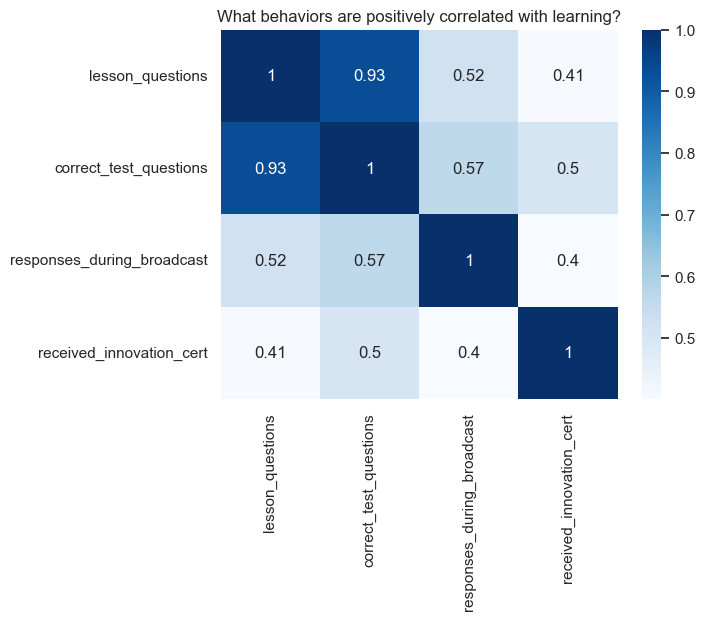

In [144]:
#Regression of broadcast activity and innovation cert

plt.title("What behaviors are positively correlated with learning?")
corr = lira_learner_outcomes.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [145]:
#Multiple Logistic Regression
y = lira_learner_outcomes["received_innovation_cert"] 
X = lira_learner_outcomes["correct_test_questions"]
mod = sm.Logit(y, X) 
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.616946
         Iterations 5
                              Logit Regression Results                              
Dep. Variable:     received_innovation_cert   No. Observations:                  414
Model:                                Logit   Df Residuals:                      413
Method:                                 MLE   Df Model:                            0
Date:                      Sun, 01 Oct 2023   Pseudo R-squ.:                 -0.7686
Time:                              16:25:17   Log-Likelihood:                -255.42
converged:                             True   LL-Null:                       -144.42
Covariance Type:                  nonrobust   LLR p-value:                       nan
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
correct_test_questions    -0.0206   

# Export Data

In [148]:
processed_data_folder = "/Users/ddbutler/repos_new/yiya_data_analysis/data/processed/"

In [149]:
lira_responses.to_pickle(processed_data_folder + "lira_responses_paid_users.pkl")

# Summary

Most messages for learners registered with the Lira course were sent near the broadcast times. There is a very weak correlation between number of messages sent messages during broadcast time (active participation in broadcasts) and performance in test questions. However, there is a strong positive correlation between unique lesson questions attempted and test performance. This may suggest:
- Answering lesson questions without listening to the radio may be sufficient to perform well in tests
- Some learners may listen to broadcasts first to understand concepts and answer questions later

Limitations
- At time of analysis, the keys for the final exam in course 3 are unclear so it was not included. 

Future Work
- The next analysis will use num_practice_questions_during and num_practice_questions_beforeafter as analysis. 

# Code Tests

In [146]:
test_data = pd.DataFrame(
    {"created": ["2022-11-26T11:15:52.000", "2022-11-15T14:15:59.000", "2022-11-26T11:15:52.000"],
     "key": ["airscience-2022a/course/step-2-investigate/step-2-lesson-3/go-to-questions#q3-why-did-the-stick-pencil-inserted-in-the-bottle-of-rice-stones-lift-up-the-bottle",
             "yiya-airscience-tests-2021/take-step-1-test#q1",
             "yiya-airscience-tests-2021/take-step-1-test#q1"]}
    )

test_data["created"] = pd.to_datetime(test_data["created"]) 
#test_data
print(test_data["created"].dt.day_name())
print(cal_user_resposes_during_broadcast(test_data))


0    Saturday
1     Tuesday
2    Saturday
Name: created, dtype: object
2
